<a href="https://colab.research.google.com/github/anagha1999/anlp-project/blob/main/ANLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook 
1. Loads the English MFD.
2. Generates Indic-SBERT word embeddings for English MFD and master moral vecotrs for each moral
3. Performs some visualizations for the English Moral vectors

Outputs:
1. `english_master_moral_vectors.pkl`

    Format:
    ```care.virtue: [-0.01993794  0.01070593 -0.00855214 -0.00665717 -0.00125954]```


In [ ]:
!wget https://raw.githubusercontent.com/medianeuroscience/emfd/refs/heads/master/dictionaries/mfd2.0.dic

--2025-11-13 23:24:19--  https://raw.githubusercontent.com/medianeuroscience/emfd/refs/heads/master/dictionaries/mfd2.0.dic
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24574 (24K) [text/plain]
Saving to: ‘mfd2.0.dic’

mfd2.0.dic          100%[===================>]  24.00K  --.-KB/s    in 0s      

2025-11-13 23:24:19 (97.9 MB/s) - ‘mfd2.0.dic’ saved [24574/24574]



In [ ]:
from typing import List
import pandas as pd
MFD2 = 'mfd2.0.dic'
nummap = dict()
mfd2 = dict()
wordmode = True
with open(MFD2, 'r') as f:
    for line in f.readlines():
        ent = line.strip().split()
        if line[0] == '%':
            wordmode = not wordmode
        elif len(ent) > 0:
            if wordmode:
                #print(ent)
                moral = nummap[ent[-1]]
                if (moral not in mfd2.keys()):
                    mfd2[moral] = []
                mfd2[moral].append(''.join([e for e in ent if e not in nummap.keys()]))

            # mfd2[]].append(ent[0])
            # elif ent[0] in nummap.keys():
            #     wordkey = ''.join([e for e in ent if e not in nummap.keys()])
            #     mfd2[wordkey] = [nummap[e] for e in ent if e in nummap.keys()]
            else:
                nummap[ent[0]] = ent[1]

# mfd2 = pd.DataFrame.from_dict(mfd2).T
# mfd2['foundation'] = mfd2[0]
# del mfd2[0]
# mfd2 = mfd2.T.to_dict()

In [ ]:
mfd2.keys()
# nummap

dict_keys(['care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice', 'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice', 'sanctity.virtue', 'sanctity.vice'])

In [ ]:
foundations = ['care','fairness','loyalty','authority','sanctity']

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
EMBEDDINGS_MODEL_NAME='l3cube-pune/indic-sentence-similarity-sbert'
model = SentenceTransformer(EMBEDDINGS_MODEL_NAME)

## Generate word embeddings


## [English] Master moral vectors

For each moral foundation, calculate the average of the word embeddings to create a single "Master Moral Vector".


Iterate through the word_embeddings dictionary and calculate the mean of the word embeddings for each moral foundation to create the Master Moral Vectors.



In [57]:
!git clone https://github.com/anagha1999/anlp-project

fatal: destination path 'anlp-project' already exists and is not an empty directory.


In [58]:
import pickle
import numpy as np

if 'anlp-project/english_master_moral_vectors.pkl' not in os.listdir():
  word_embeddings = {}
  for foundation, words in mfd2.items():
    word_embeddings[foundation] = model.encode(words)

  master_moral_vectors = {}
  for foundation, embeddings in word_embeddings.items():
      master_moral_vectors[foundation] = np.mean(embeddings, axis=0)

  print("Master Moral Vectors:")
  for foundation, vector in master_moral_vectors.items():
      print(f"{foundation}: {vector[:5]}...") # Print first 5 elements for brevity

  with open('english_master_moral_vectors.pkl', 'wb') as f:
    pickle.dump(master_moral_vectors, f)

  print("master_moral_vectors saved to english_master_moral_vectors.pkl")
else:
  with open('anlp-project/english_master_moral_vectors.pkl', 'rb') as f:
    master_moral_vectors = pickle.load(f)

Master Moral Vectors:
care.virtue: [-0.01993794  0.01070593 -0.00855214 -0.00665717 -0.00125954]...
care.vice: [-0.01250593  0.00353126  0.01182757  0.00208265 -0.00288362]...
fairness.virtue: [-0.0180129   0.00632953 -0.0019798  -0.01034678  0.00363413]...
fairness.vice: [-0.00028417  0.00463362  0.02123481 -0.00882659 -0.00321823]...
loyalty.virtue: [-0.01397436  0.00464188  0.00862098 -0.00541304  0.00753156]...
loyalty.vice: [-0.00110872 -0.00215744  0.01932478 -0.00913977 -0.00764371]...
authority.virtue: [-0.01560191  0.01283187  0.0074867  -0.00469211  0.0059442 ]...
authority.vice: [-0.00703471  0.00466675  0.02161571 -0.00663757 -0.00200733]...
sanctity.virtue: [-0.01758363  0.01113342  0.01014273 -0.00786959 -0.01023418]...
sanctity.vice: [-0.00735209  0.00529846  0.03018802 -0.00675027 -0.00358601]...
master_moral_vectors saved to english_master_moral_vectors.pkl


# Plot each word in the mfd2 dataset along with its corresponding "Master Moral Vector" for each moral foundation.

### Combine embeddings

Combine the individual word embeddings and the master moral vectors into a single dataset.


In [ ]:
all_embeddings = []
embedding_labels = []

for foundation, embeddings in word_embeddings.items():
    all_embeddings.extend(embeddings)
    embedding_labels.extend([f'{foundation} - word'] * len(embeddings))

for foundation, vector in master_moral_vectors.items():
    all_embeddings.append(vector)
    embedding_labels.append(f'{foundation} - master')

print(f"Total number of embeddings: {len(all_embeddings)}")
print(f"Total number of labels: {len(embedding_labels)}")

Total number of embeddings: 2113
Total number of labels: 2113


## Dimensionality reduction


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

In [ ]:
import pandas as pd

df_reduced = pd.DataFrame(reduced_embeddings, columns=['dim1', 'dim2'])
df_reduced['label'] = embedding_labels
print(df_reduced.head())

       dim1      dim2               label
0  0.068496 -0.181271  care.virtue - word
1  0.073438 -0.123214  care.virtue - word
2  0.017626 -0.167575  care.virtue - word
3  0.044028 -0.239229  care.virtue - word
4 -0.029405  0.036257  care.virtue - word


## Visualize embeddings

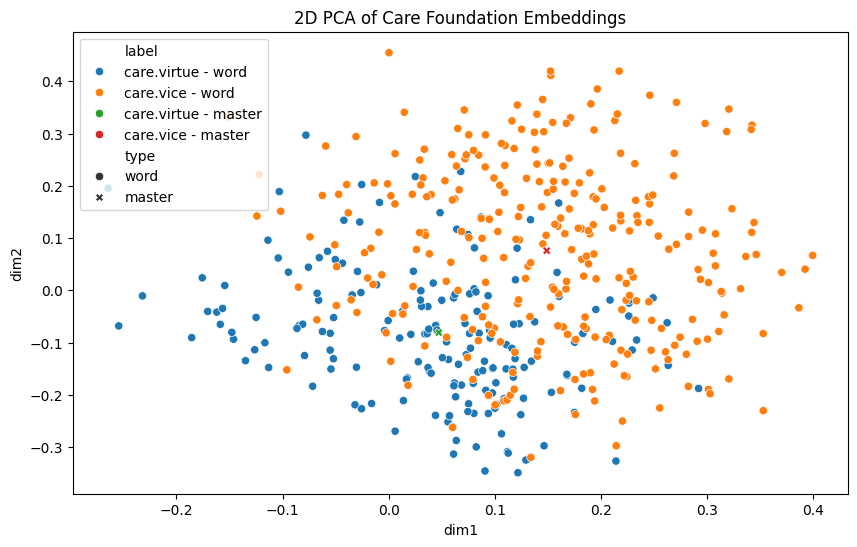

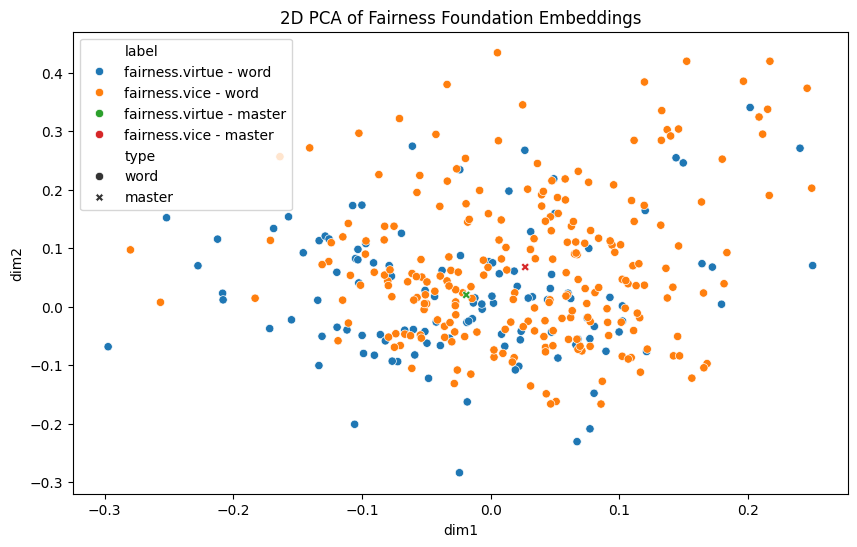

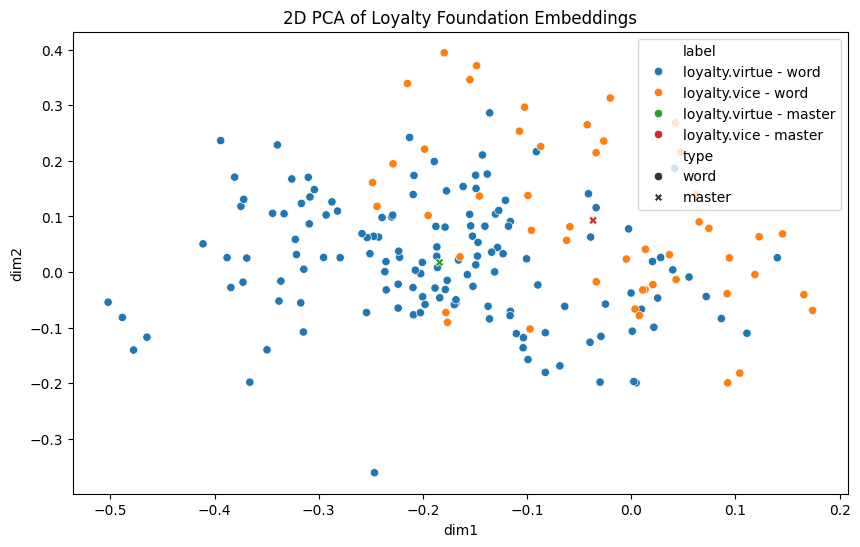

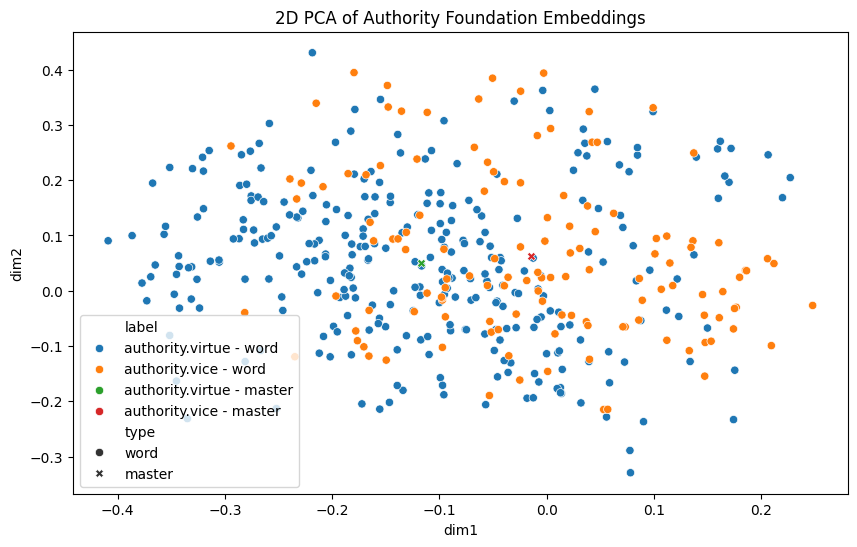

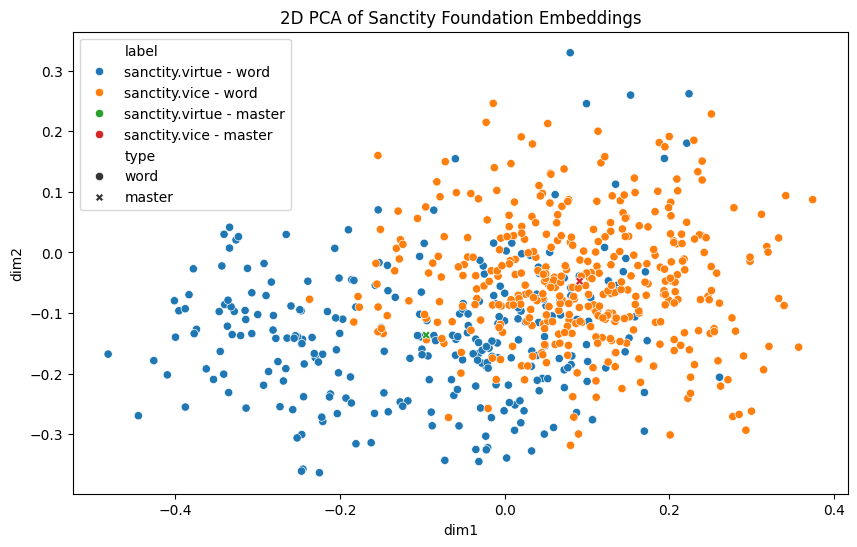

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_reduced['type'] = df_reduced['label'].apply(lambda x: 'master' if 'master' in x else 'word')

# Get the unique moral foundations
foundations = df_reduced['label'].apply(lambda x: x.split('.')[0]).unique()

for foundation in foundations:
    plt.figure(figsize=(10, 6))
    foundation_df = df_reduced[df_reduced['label'].str.startswith(foundation)]
    sns.scatterplot(data=foundation_df, x='dim1', y='dim2', hue='label', style='type')
    plt.title(f'2D PCA of {foundation.capitalize()} Foundation Embeddings')
    plt.show()

In [55]:
import pickle

with open('english_master_moral_vectors.pkl', 'wb') as f:
    pickle.dump(master_moral_vectors, f)

print("master_moral_vectors saved to english_master_moral_vectors.pkl")

master_moral_vectors saved to english_master_moral_vectors.pkl


In [56]:
import os

if 'english_master_moral_vectors.pkl' in os.listdir():
    print("File 'english_master_moral_vectors.pkl' successfully created.")
else:
    print("Error: File 'english_master_moral_vectors.pkl' not found.")

File 'english_master_moral_vectors.pkl' successfully created.


## t-SNE

In [59]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Convert all_embeddings to a numpy array
embeddings_array = np.array(all_embeddings)

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(embeddings_array)

# Create a DataFrame for the results
df_tsne = pd.DataFrame(tsne_results, columns=['dim1', 'dim2'])
df_tsne['label'] = embedding_labels

# Add a type column to distinguish between 'master' vectors and 'word' vectors
df_tsne['type'] = df_tsne['label'].apply(lambda x: 'master' if 'master' in x else 'word')

# Display the first few rows
print(df_tsne.head())

        dim1       dim2               label  type
0  63.376705  -0.681973  care.virtue - word  word
1  64.511948  -1.310974  care.virtue - word  word
2  61.817085   0.792343  care.virtue - word  word
3  52.290035  20.288456  care.virtue - word  word
4  55.367207   1.720789  care.virtue - word  word


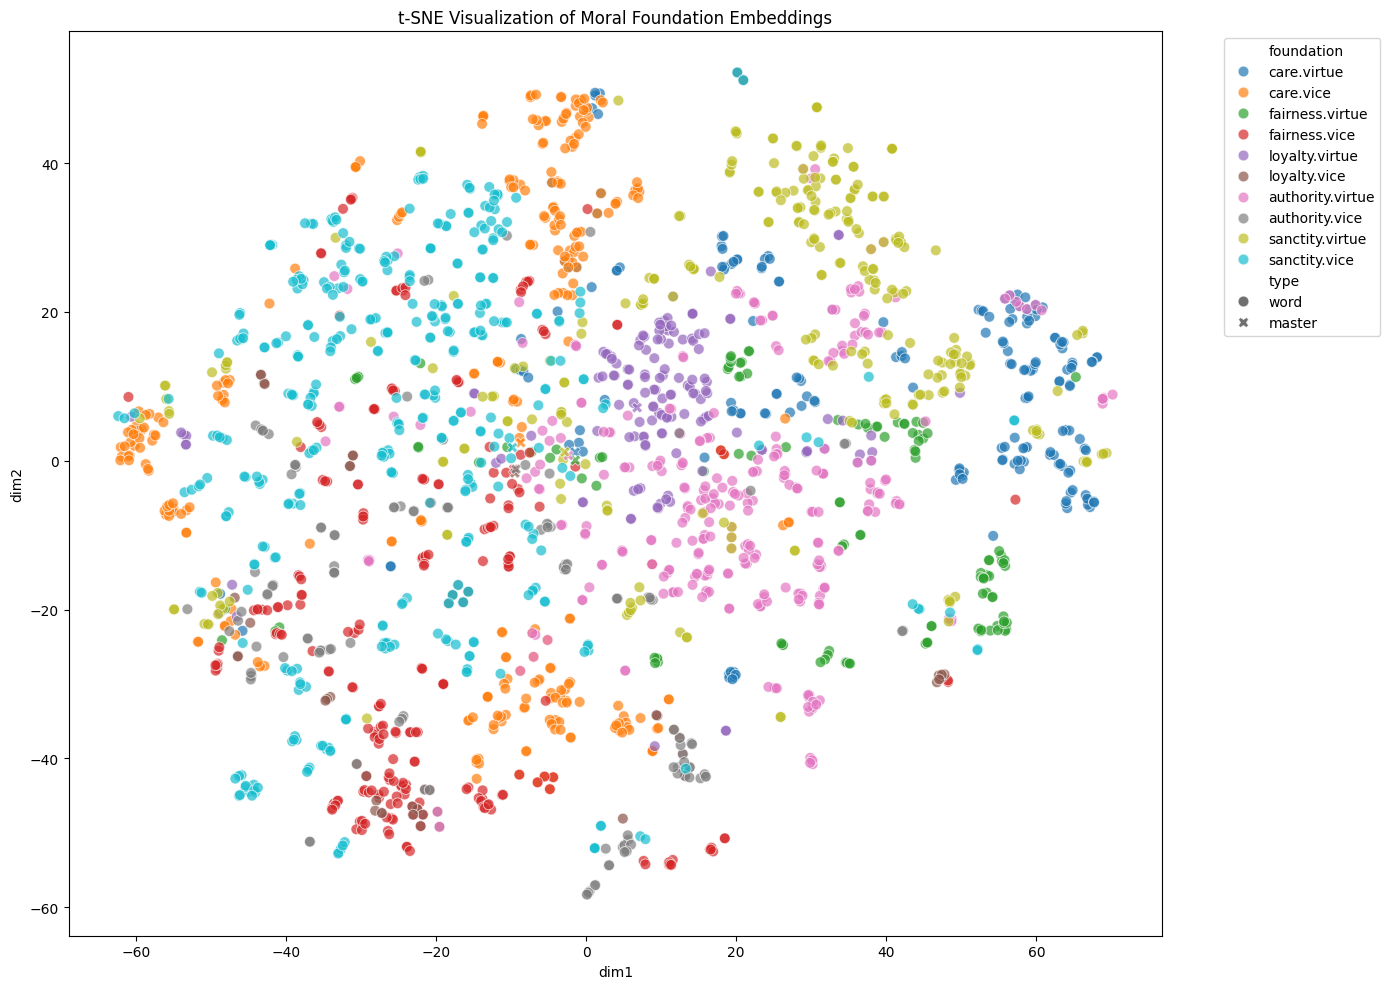

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the moral foundation name for the hue (remove ' - word'/' - master' suffix)
df_tsne['foundation'] = df_tsne['label'].apply(lambda x: x.split(' - ')[0])

plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df_tsne,
    x='dim1',
    y='dim2',
    hue='foundation',
    style='type',
    alpha=0.7,
    s=60 # Adjust marker size for visibility
)
plt.title('t-SNE Visualization of Moral Foundation Embeddings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()